In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('pastel')

In [17]:
import langid
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/xue/nltk_data...


True

In [4]:
reviews=pd.read_csv('reviews_summary.csv')

In [5]:
reviews.shape

(401963, 6)

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [7]:
reviews['comments'].isnull().sum()

496

In [8]:
reviews['comments']=reviews['comments'].fillna('')

In [9]:
languages=[]
errors=[]
for i in reviews['comments'][reviews['comments']!='']:
    try:
        language=detect(i)
        languages.append(language)
    except:
        language='error'
        errors.append(i)

In [10]:
len(languages)

400821

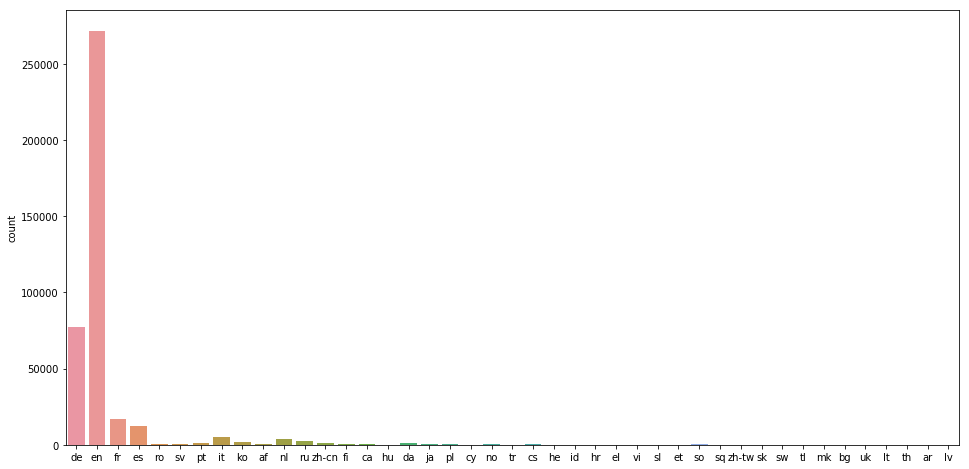

In [11]:
fig=plt.figure(figsize=(16,8))
sns.countplot(languages)

In [21]:
sentiment= SentimentIntensityAnalyzer()

In [42]:
reviews['comments'][100]

'Solid place from which to explore Berlin. Has everything needed for a comfortable stay and well-located close to public transport and some main green areas, historic sites and shopping and cafe spaces. Jan was flexible and helpful at check-in & check-out, would stay here again.'

In [43]:
sentiment.polarity_scores(reviews['comments'][100])

{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.8225}

In [59]:
reviews['positive']=reviews['comments'].apply(lambda x: sentiment.polarity_scores(x)['pos'])
reviews['negative']=reviews['comments'].apply(lambda x: sentiment.polarity_scores(x)['neg'])
reviews['score']=reviews['comments'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

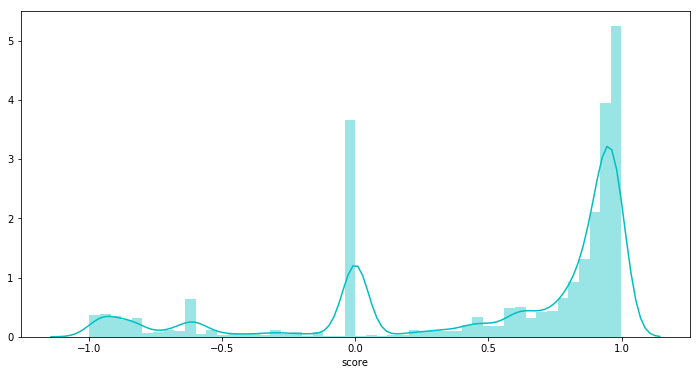

In [63]:
figure=plt.figure(figsize=(12,6))
sns.distplot(reviews['score'].sort_values(),color='c')

In [82]:
reviews.sort_values(by=['score'],ascending=False)['comments'][:5]

55801     For was my first experience alone in an airbnb...
49733     My best girlfriend and I we traveling around E...
113658    Aglaja was a great host from the very start. T...
72777     Dear Elisa and Dear Francesco,\r\n\r\nFirst of...
110220    I had an extremely warm, restful and wonderful...
Name: comments, dtype: object

In [83]:
reviews.to_csv('scored_reviews.csv')